# **Uber Ride Data Analysis**

**1. Introduction**

Overview :     

This project analyzes Uber's ride data, exploring factors like service types, fare calculation, ride duration, and user categories. It aims to uncover insights on popular pickup/drop-off locations, demand patterns, and ride characteristics. The analysis delves into time-based trends, outliers, and correlations between variables. Additionally, it investigates ride purposes, station performances, and busiest hours, providing a comprehensive understanding of Uber's operational landscape



**Loading DataSet :**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('UberDataset.csv')

**Checking null values**

In [71]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

**Data Cleaning**

In [72]:
# 1. Data Cleaning
# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# 2. Basic Data Summary
# Summary statistics
print(df.describe())

            MILES
count  652.000000
mean    11.198313
std     23.004020
min      0.500000
25%      3.200000
50%      6.400000
75%     10.400000
max    310.300000


In [73]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  652 non-null    object 
 1   END_DATE    652 non-null    object 
 2   CATEGORY    652 non-null    object 
 3   START       652 non-null    object 
 4   STOP        652 non-null    object 
 5   MILES       652 non-null    float64
 6   PURPOSE     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


# **Data Visualizing & Preprocessing**

**Bar Chart of ride types**

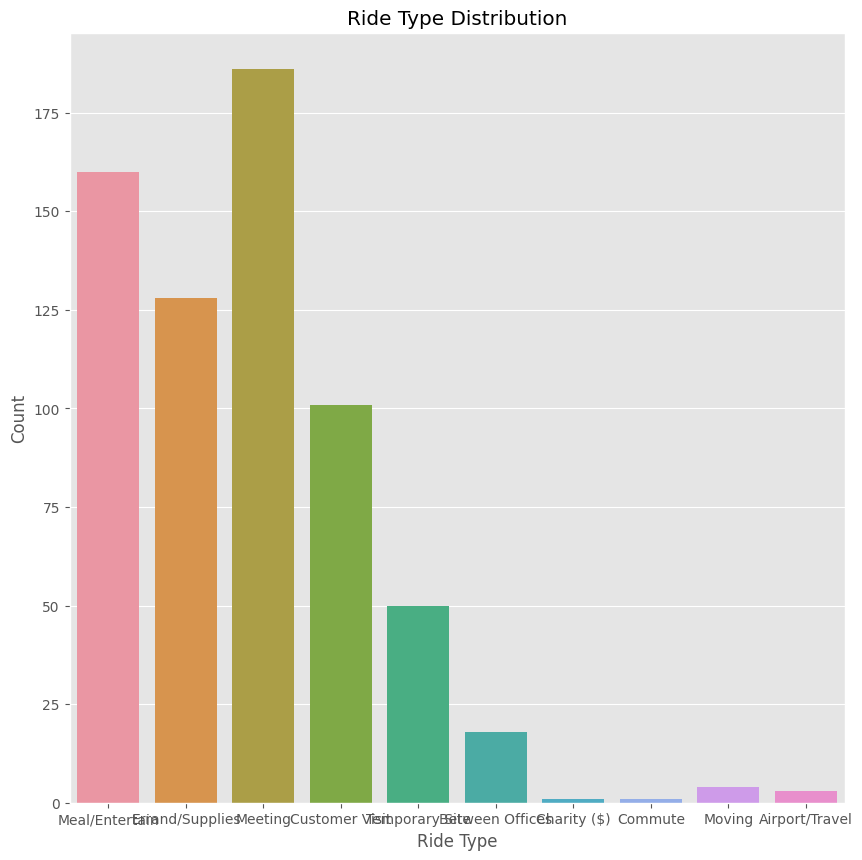

In [75]:
# Bar chart of ride types
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='PURPOSE')
plt.title('Ride Type Distribution')
plt.xlabel('Ride Type')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'miles ')

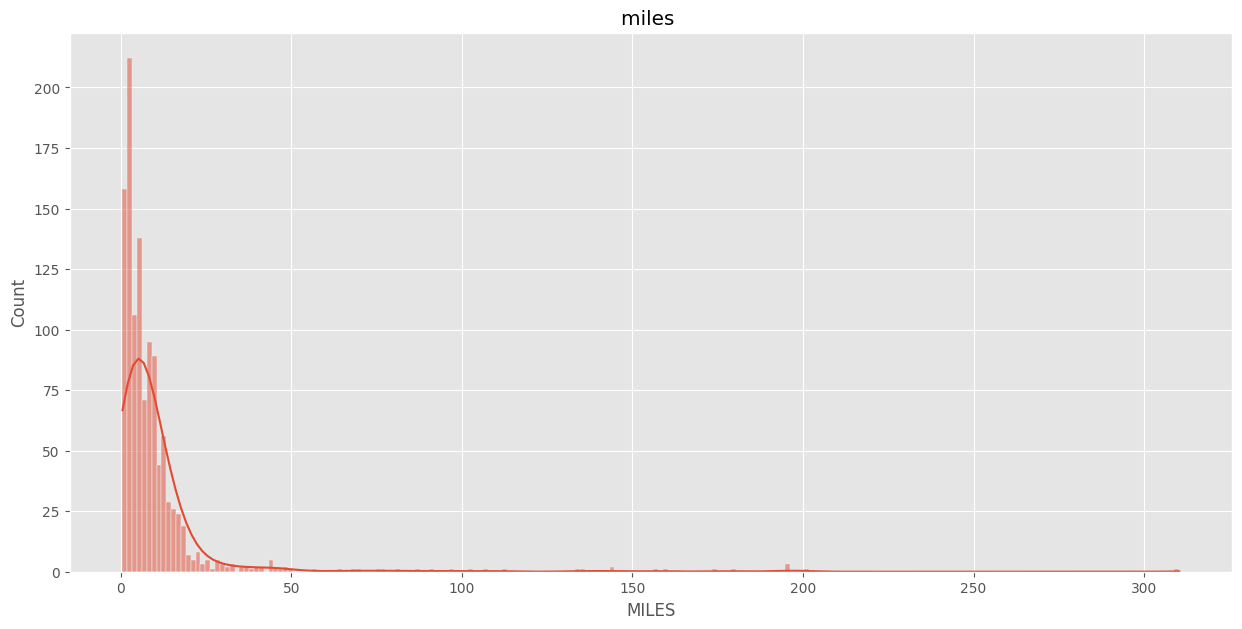

In [121]:
plt.figure(figsize = (15,7))
sns.histplot(data = df , x = 'MILES', kde = True);
plt.title("miles ")

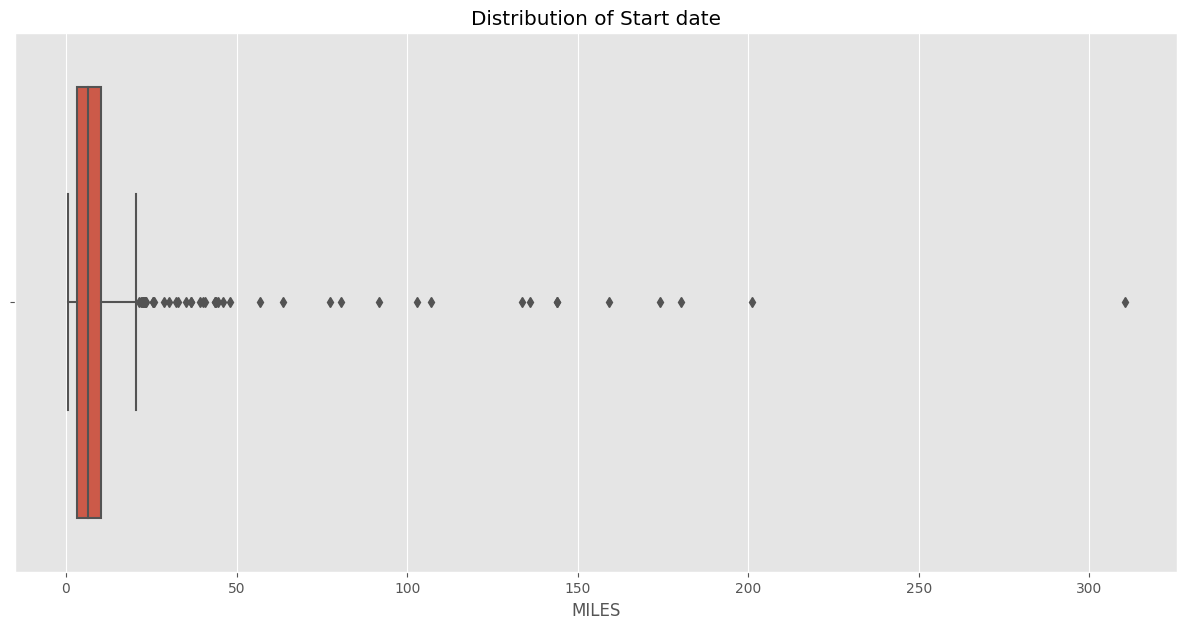

In [78]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df , x = 'MILES');
plt.title("Distribution of Start date");

Sorting values in ascending


In [79]:
df.sort_values(by=['MILES'],ascending=False).head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting
559,7/17/2016 12:20,7/17/2016 15:25,Personal,Boone,Cary,180.2,Commute
297,04-02-2016 19:38,04-02-2016 22:36,Business,Jacksonville,Ridgeland,174.2,Customer Visit
299,04-03-2016 02:00,04-03-2016 04:16,Business,Florence,Cary,159.3,Meeting
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit
298,04-02-2016 23:11,04-03-2016 01:34,Business,Ridgeland,Florence,144.0,Meeting
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
870,10/28/2016 18:13,10/28/2016 20:07,Business,Winston Salem,Asheville,133.6,Meeting
869,10/28/2016 15:53,10/28/2016 17:59,Business,Cary,Winston Salem,107.0,Meeting


In [80]:
df1=df.copy() #taking copy of dataframe

Cleaning and replacing some data type error in dates format to have a clear insights from this data :

In [81]:
# Assuming the date formats vary, clean and standardize them
df1["START_DATE"] = df1["START_DATE"].str.replace('-', '/').str.replace('.', '/').str.replace(' ', ' ')

# Then, convert to datetime with the correct format
df1["START_DATE"] = pd.to_datetime(df1["START_DATE"], format="%m/%d/%Y %H:%M")


<ipython-input-81-a4092f550a81>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["START_DATE"] = df1["START_DATE"].str.replace('-', '/').str.replace('.', '/').str.replace(' ', ' ')


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  652 non-null    datetime64[ns]
 1   END_DATE    652 non-null    object        
 2   CATEGORY    652 non-null    object        
 3   START       652 non-null    object        
 4   STOP        652 non-null    object        
 5   MILES       652 non-null    float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 40.8+ KB


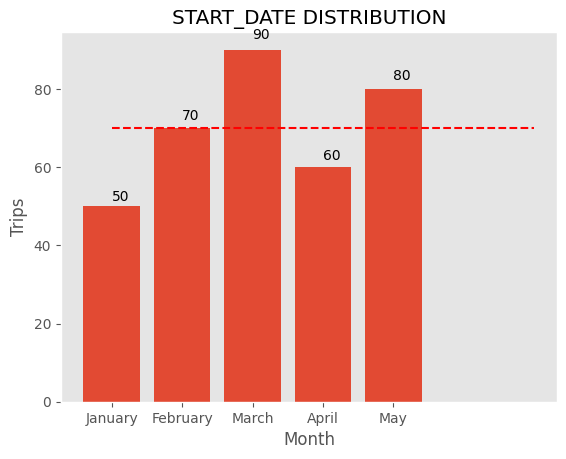

In [83]:
# Assuming sd_m_dis is a Pandas Series or DataFrame with index representing months and values representing trips
import pandas as pd

# Sample data (you should replace this with your actual data)
data = {'January': 50, 'February': 70, 'March': 90, 'April': 60, 'May': 80}

# Creating a Pandas Series
sd_m_dis = pd.Series(data)

# Rest of your code (using sd_m_dis)
# Create a figure
plt.figure(0)

# Create the bar chart
rects = plt.bar(sd_m_dis.index, sd_m_dis.values)

# Add a red dashed line for the mean
plt.plot([0, len(sd_m_dis.index) + 1], [sd_m_dis.mean(), sd_m_dis.mean()], "r--")

# Add title, labels, grid, and labels for bars
plt.title("START_DATE DISTRIBUTION")
plt.xlabel("Month")
plt.ylabel("Trips")
plt.grid()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., 1.03 * height, '%s' % int(height))

# Call the autolabel function to add labels on top of bars
autolabel(rects)

# Show the plot
plt.show()


In [84]:
# Assuming sd_h_dis is a Pandas Series or DataFrame with index representing hours and values representing trips
import pandas as pd

# Sample data (replace this with your actual data)
data = {'0-3 hours': 20, '4-7 hours': 30, '8-11 hours': 40, '12-15 hours': 50}

# Creating a Pandas Series
sd_h_dis = pd.Series(data)

# Rest of your code (using sd_h_dis)
# Create a bar chart and other plotting details...


Getting top category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

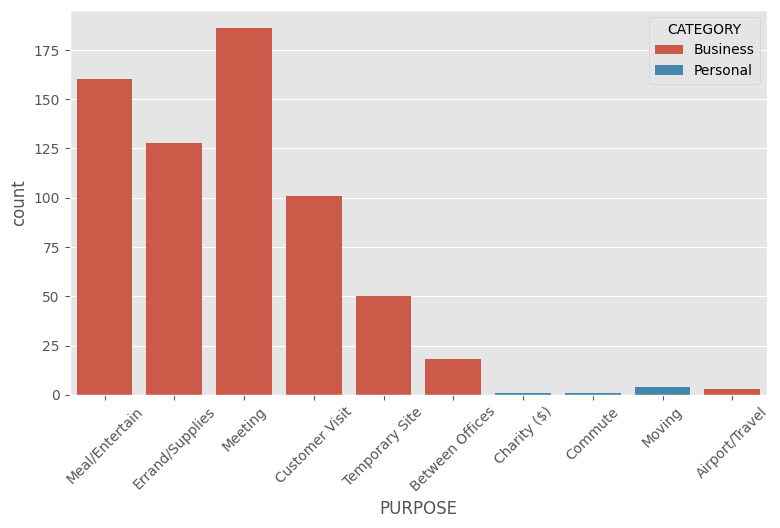

In [85]:
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'PURPOSE', hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45)

Car rides dtop locstion frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Morrisville'),
  Text(2, 0, 'Unknown Location'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Durham'),
  Text(5, 0, 'Kar?chi'),
  Text(6, 0, 'Raleigh'),
  Text(7, 0, 'Lahore'),
  Text(8, 0, 'Islamabad'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Berkeley'),
  Text(11, 0, 'Midtown'),
  Text(12, 0, 'Kissimmee'),
  Text(13, 0, 'Oakland'),
  Text(14, 0, 'San Francisco'),
  Text(15, 0, 'Waverly Place'),
  Text(16, 0, 'R?walpindi'),
  Text(17, 0, 'Wayne Ridge'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Westpark Place'),
  Text(20, 0, 'Rawalpindi'),
  Text(21, 0, 'New York'),
  Text(22, 0, 'Tanglewood'),
  Text(23, 0, 'Fort Pierce'),
  Text(24, 0, 'Chessington')])

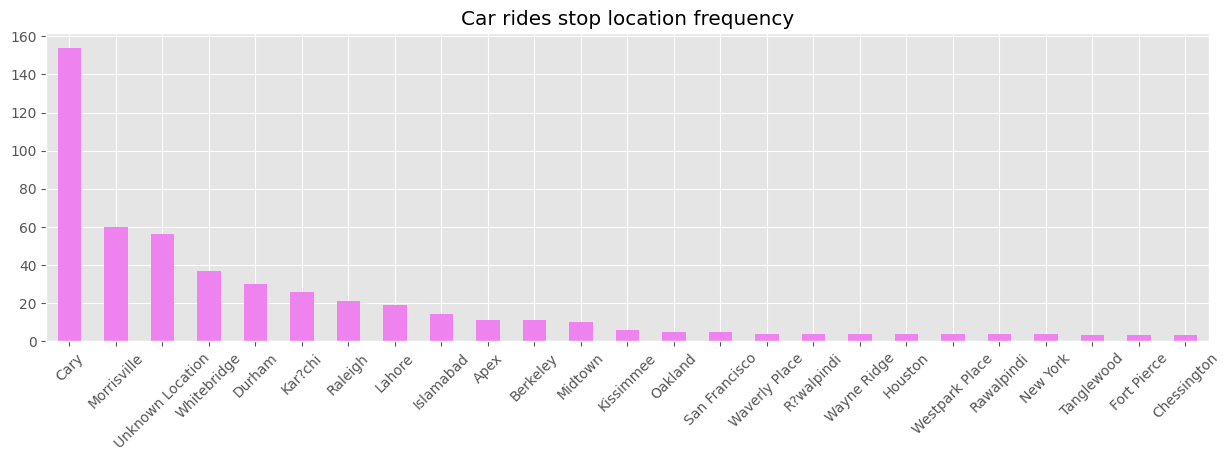

In [86]:
plt.figure(figsize = (15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = 'bar', color = 'violet')
plt.title('Car rides stop location frequency')
plt.xticks(rotation = 45)

In [87]:
# Assuming the date formats vary, clean and standardize them
df1["END_DATE"] = df1["END_DATE"].str.replace('-', '/').str.replace('.', '/').str.replace(' ', ' ')

# Then, convert to datetime with the correct format
df1["END_DATE"] = pd.to_datetime(df1["END_DATE"], format="%m/%d/%Y %H:%M")


<ipython-input-87-0cef436533a9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["END_DATE"] = df1["END_DATE"].str.replace('-', '/').str.replace('.', '/').str.replace(' ', ' ')


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  652 non-null    datetime64[ns]
 1   END_DATE    652 non-null    datetime64[ns]
 2   CATEGORY    652 non-null    object        
 3   START       652 non-null    object        
 4   STOP        652 non-null    object        
 5   MILES       652 non-null    float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [89]:
# Assuming ct_dis is a Pandas Series or DataFrame with index representing categories and values representing quantity
import pandas as pd

# Sample data (replace this with your actual data)
data = {'Category A': 30, 'Category B': 40, 'Category C': 50, 'Category D': 20}

# Creating a Pandas Series
ct_dis = pd.Series(data)

# Rest of your code (using ct_dis)
# Create a bar chart and other plotting details...


In [90]:
st_dis=df1["START"].value_counts()
st_dis.sort_values(inplace=True,ascending=False)
st_dis=st_dis.iloc[:10]
print("Start place:\n",st_dis)

Start place:
 Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               29
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Midtown              11
Name: START, dtype: int64


In [91]:
stp_dis=df["STOP"].value_counts()
stp_dis.sort_values(ascending=False)
stp_dis=stp_dis.iloc[:10]
print("STOP_PLACE:\n",stp_dis)

STOP_PLACE:
 Cary                154
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Apex                 11
Name: STOP, dtype: int64


In [92]:
df1['triptype']=np.where(df1['MILES']<=df1['MILES'].mean(),'short','long')

In [93]:
trip_type=df1['triptype'].value_counts()
trip_type.sort_values(ascending=False)
trip_type=trip_type.iloc[:10]
print("PURPOSE:\n",trip_type)

PURPOSE:
 short    505
long     147
Name: triptype, dtype: int64


In [94]:
df1['KMS']=df1['MILES'].apply(lambda Y :Y*1.6)

In [95]:
df1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,triptype,KMS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,short,8.16
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,short,7.68
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,short,7.52
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,long,101.92
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,short,6.88


In [96]:
df1["END_DATE"]=pd.to_datetime(df1["END_DATE"],format="%m/%d/%Y %H:%M") #changing the datatype and format of END date
#Calculate the duration for the rides
df1['Duration'] = df1['END_DATE'] - df1['START_DATE']
#convert duration to numbers(minutes)
df1.loc[:, 'Duration'] = df1['Duration'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)
df1['SpeedMph']=df1['MILES']/df1['Duration'] #creating speed column

In [97]:
print('Average length of trip in minutes:\n',df1['Duration'].mean())

Average length of trip in minutes:
 23.395705521472394


In [98]:
print('Trips per month', sd_m_dis)

Trips per month January     50
February    70
March       90
April       60
May         80
dtype: int64


In [99]:
print('Trips per hour',sd_h_dis)

Trips per hour 0-3 hours      20
4-7 hours      30
8-11 hours     40
12-15 hours    50
dtype: int64


In [100]:
df1.groupby(['CATEGORY','PURPOSE'])['MILES'].agg(['mean','count','max','min'])

mean  count    max    min
CATEGORY PURPOSE                                         
Business Airport/Travel     5.500000      3    7.6    4.1
         Between Offices   10.944444     18   39.2    1.9
         Customer Visit    20.688119    101  310.3    0.8
         Errand/Supplies    3.968750    128   22.3    0.5
         Meal/Entertain     5.698125    160   36.5    0.6
         Meeting           15.276344    186  201.0    0.7
         Temporary Site    10.474000     50   48.2    1.8
Personal Charity ($)       15.100000      1   15.1   15.1
         Commute          180.200000      1  180.2  180.2
         Moving             4.550000      4    6.1    3.3

In [101]:
df1.groupby(['CATEGORY','triptype','PURPOSE'])['SpeedMph'].agg(['mean','median','max','min','count'])

mean    median       max       min  \
CATEGORY triptype PURPOSE                                                   
Business long     Between Offices  0.456074  0.421305  0.759259  0.222642   
                  Customer Visit   0.683504  0.626786  1.726316  0.244231   
                  Errand/Supplies  0.464827  0.391228  0.763158  0.355769   
                  Meal/Entertain   0.584038  0.541406  1.183333  0.325490   
                  Meeting          0.573389  0.477104  1.525000  0.128788   
                  Temporary Site   0.647080  0.460000  2.937500  0.302381   
         short    Airport/Travel   0.225526  0.262069  0.273333  0.141176   
                  Between Offices  0.390767  0.411765  0.516667  0.210526   
                  Customer Visit   0.401652  0.332292  3.800000  0.160000   
                  Errand/Supplies  0.318684  0.300000  1.125000  0.100000   
                  Meal/Entertain   0.344716  0.312500  1.075000  0.100000   
                  Meeting          0.425197  0.427717  1.420000  0.100000   
                  Temporary Site   0.402838  0.380000  1.980000  0.132500   
Personal long     Charity ($)      0.559259  0.559259  0.559259  0.559259   
                  Commute          0.974054  0.974054  0.974054  0.974054   
         short    Moving           0.306473  0.296875  0.341667  0.290476   

                                   count  
CATEGORY triptype PURPOSE                 
Business long     Between Offices     10  
                  Customer Visit      37  
                  Errand/Supplies      5  
                  Meal/Entertain      12  
                  Meeting             64  
                  Temporary Site      17  
         short    Airport/Travel       3  
                  Between Offices      8  
                  Customer Visit      64  
                  Errand/Supplies    123  
                  Meal/Entertain     148  
                  Meeting            122  
                  Temporary Site      33  
Personal long     Charity ($)          1  
                  Commute              1  
         short    Moving               4

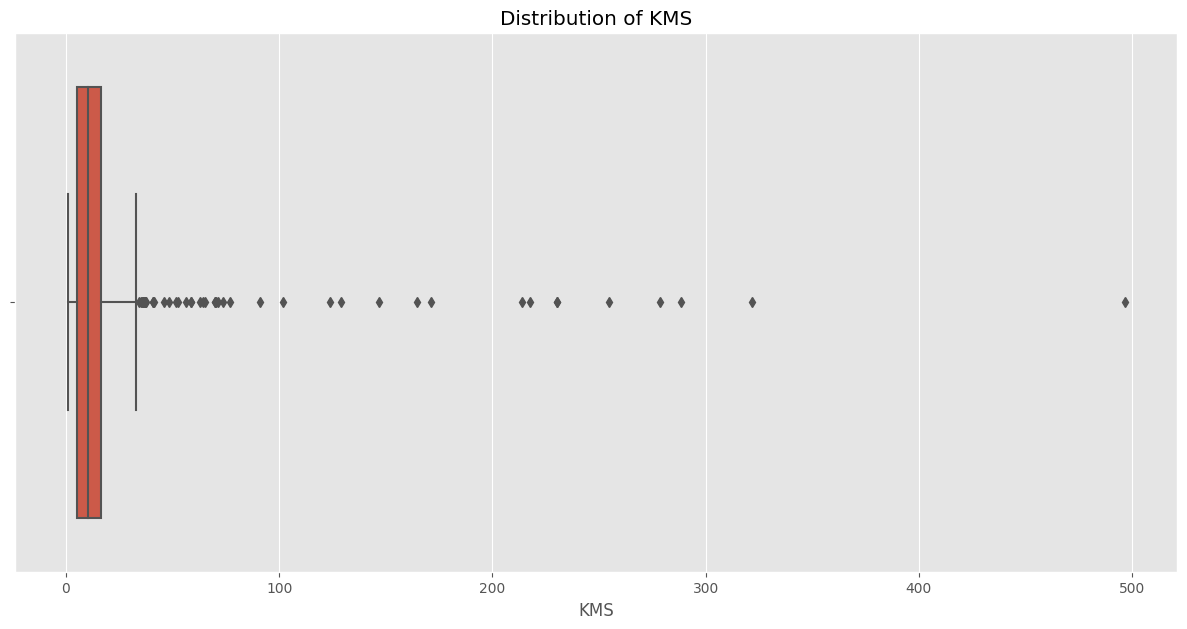

In [102]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df1 , x = 'KMS');
plt.title("Distribution of KMS");

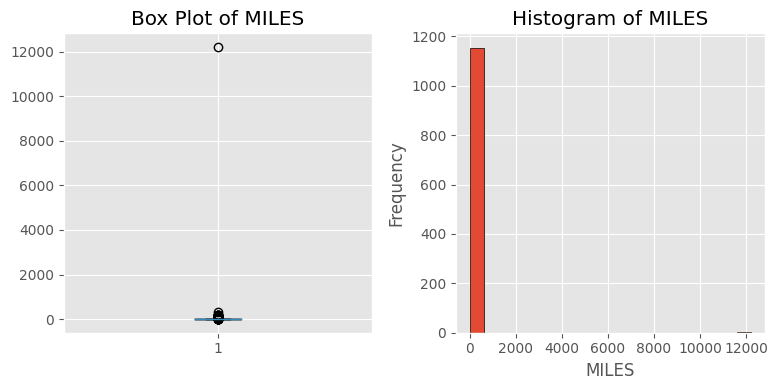

Outliers in MILES:
            START_DATE          END_DATE  CATEGORY             START  \
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
25     1/14/2016 16:29   1/14/2016 17:05  Business           Houston   
36     1/20/2016 13:25   1/20/2016 14:19  Business           Raleigh   
62    02-01-2016 12:10  02-01-2016 12:43  Business       Chapel Hill   
108     2/16/2016 3:21    2/16/2016 4:13  Business        Katunayaka   
...                ...               ...       ...               ...   
1088  12/21/2016 20:56  12/21/2016 23:42  Business        Rawalpindi   
1089  12/22/2016 15:40  12/22/2016 16:38  Business  Unknown Location   
1092  12/22/2016 17:56  12/22/2016 18:29  Business  Unknown Location   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES         PURPOSE  
4      West Palm Beach     63.7  Customer Visit  
25             H

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('UberDataset.csv')

numerical_column = 'MILES'

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df[numerical_column])
plt.title(f'Box Plot of {numerical_column}')

plt.subplot(1, 2, 2)
plt.hist(df[numerical_column], bins=20, edgecolor='k')
plt.title(f'Histogram of {numerical_column}')
plt.xlabel(numerical_column)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Detect and print outliers using the IQR method
Q1 = df[numerical_column].quantile(0.25)
Q3 = df[numerical_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[numerical_column] < lower_bound) | (df[numerical_column] > upper_bound)]
print(f'Outliers in {numerical_column}:')
print(outliers)


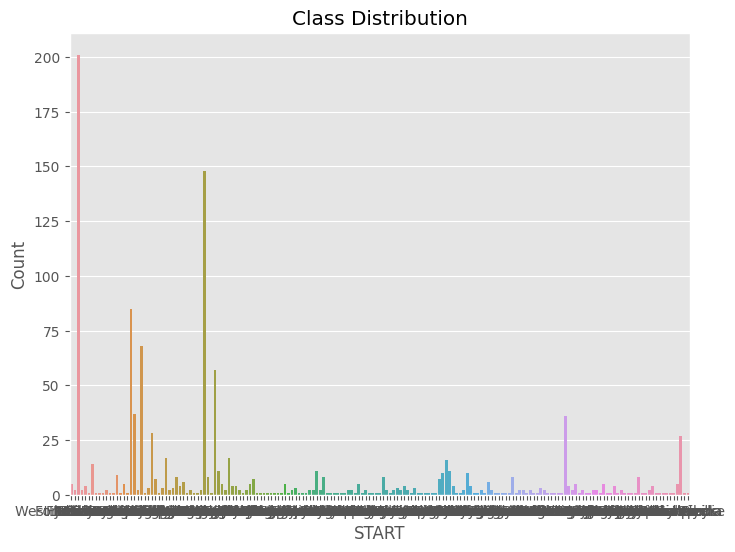

Class Percentages:
Cary                17.387543
Unknown Location    12.802768
Morrisville          7.352941
Whitebridge          5.882353
Islamabad            4.930796
                      ...    
Florence             0.086505
Ridgeland            0.086505
Daytona Beach        0.086505
Sky Lake             0.086505
Gampaha              0.086505
Name: START, Length: 177, dtype: float64


In [104]:
target_column = 'START'

# Create a count plot to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=target_column)
plt.title('Class Distribution')
plt.xlabel(target_column)
plt.ylabel('Count')
plt.show()

# Calculate class percentages
class_counts = df[target_column].value_counts()
class_percentages = class_counts / len(df) * 100
print("Class Percentages:")
print(class_percentages)

In [105]:
start_point = df.START.value_counts()
start_point

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [106]:
print(start_point[start_point > 10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64


<Axes: ylabel='START'>

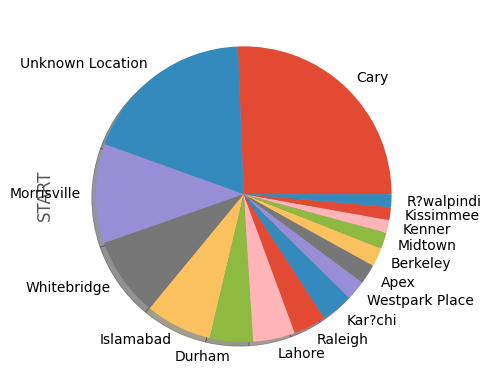

In [107]:
start_point[start_point > 10].plot(kind = 'pie', shadow = True)

<Axes: ylabel='STOP'>

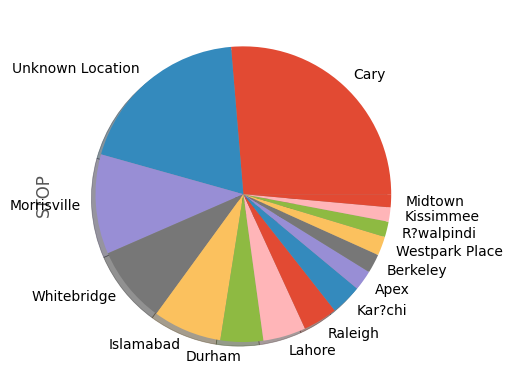

In [108]:
stop_point = df.STOP.value_counts()
stop_point[stop_point > 10].plot(kind = 'pie', shadow = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Midtown'),
  Text(13, 0, 'Kenner'),
  Text(14, 0, 'Kissimmee'),
  Text(15, 0, 'R?walpindi'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Emeryville'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'Edgehill Farms'),
  Text(20, 0, 'Central'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Orlando'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'Banner Elk')])

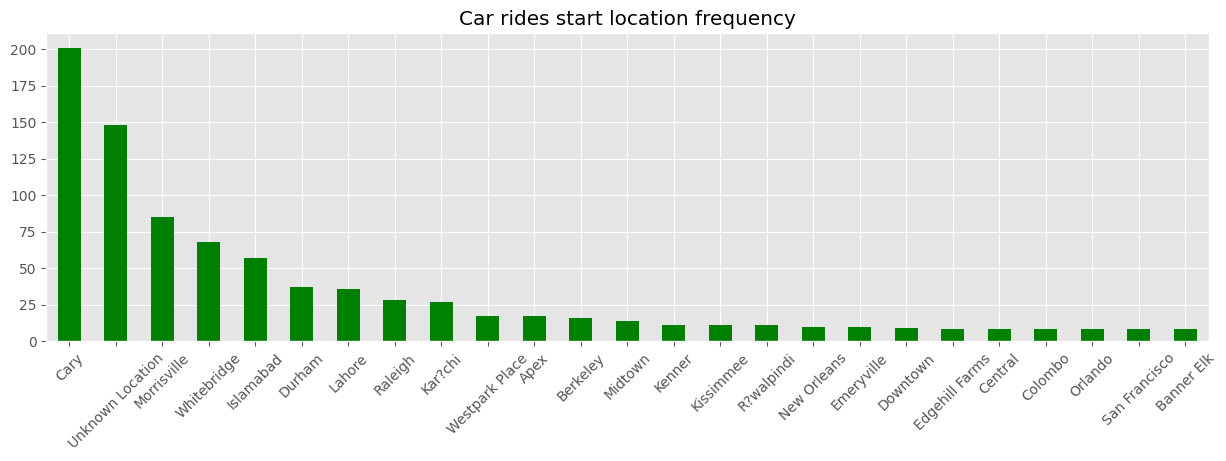

In [109]:
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind = 'bar', color = 'g')
plt.title('Car rides start location frequency')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

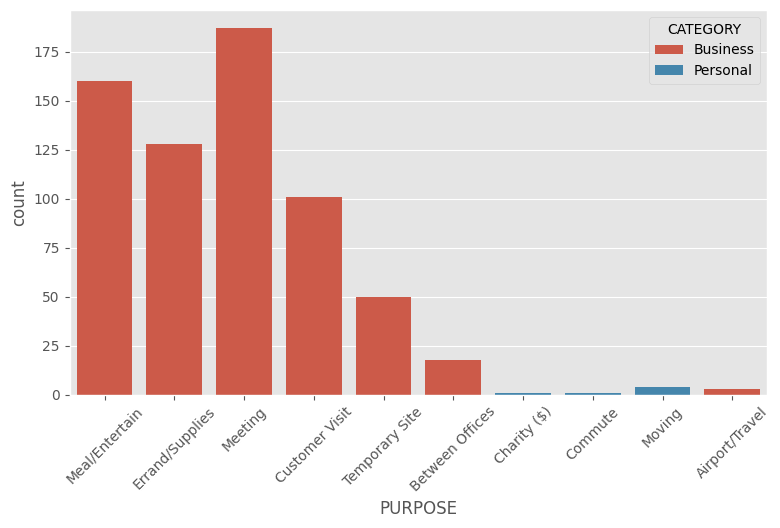

In [110]:
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'PURPOSE', hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45)

In [111]:
plt.figure(figsize = (8,5))
def round(x):
  if x['START'] == x['STOP']:
    return 'yes'
  else:
    return 'no'

df['Round_trip'] = df.apply(round, axis = 1)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Round_trip
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,yes
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,yes
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,yes
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,yes
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,no
...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,no
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,yes
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,no
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,no


<Figure size 800x500 with 0 Axes>

<Axes: >

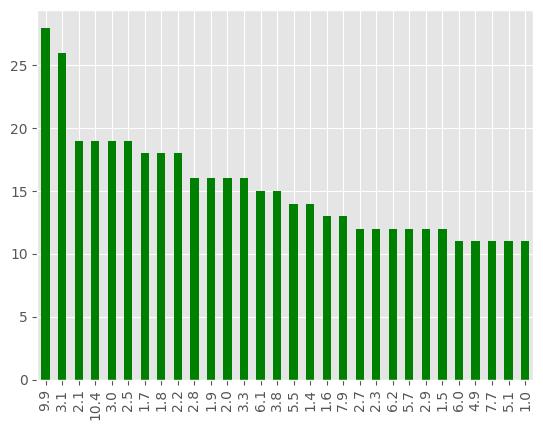

In [112]:
miles_count = df.MILES.value_counts()
miles_count[miles_count > 10].plot(kind = 'bar', color = 'g')

In [113]:
summary_statistics = df.describe()

# Print the summary statistics
print(summary_statistics)

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [114]:
print(df.dtypes)

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
Round_trip     object
dtype: object


In [115]:
df.corr()

<ipython-input-115-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MILES
MILES,1.0


In [116]:
plt.figure(figsize = (8,5))
def round(x):
  if x['START'] == x['STOP']:
    return 'yes'
  else:
    return 'no'

df['Round_trip'] = df.apply(round, axis = 1)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Round_trip
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,yes
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,yes
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,yes
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,yes
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,no
...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,no
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,yes
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,no
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,no


<Figure size 800x500 with 0 Axes>

<ipython-input-117-c3c57ea6a14d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE'] = pd.to_datetime(df['START_DATE'])
<ipython-input-117-c3c57ea6a14d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE'] = pd.to_datetime(df['END_DATE'])
<ipython-input-117-c3c57ea6a14d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

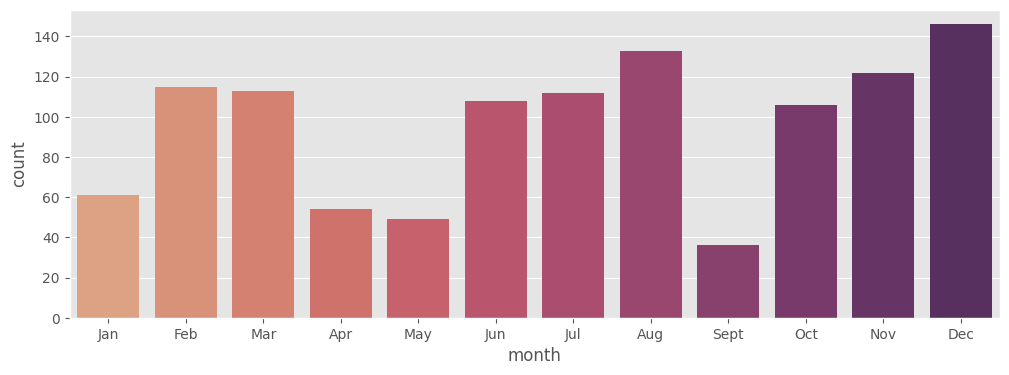

In [117]:
df = df[df['START_DATE'] != 'Totals']

# Convert START_DATE and END_DATE columns to datetime objects
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Calculate the time duration in minutes
df['minutes'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

# Extract the month from the 'START_DATE' column
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

# Define a dictionary to map month numbers to month names
dic = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sept',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Map the month numbers to month names using the dictionary
df['month'] = df['month'].map(dic)

# Convert 'month' column to a categorical data type
df['month'] = pd.Categorical(df['month'], categories=dic.values(), ordered=True)

# Plot the countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='month', palette='flare')
plt.show()


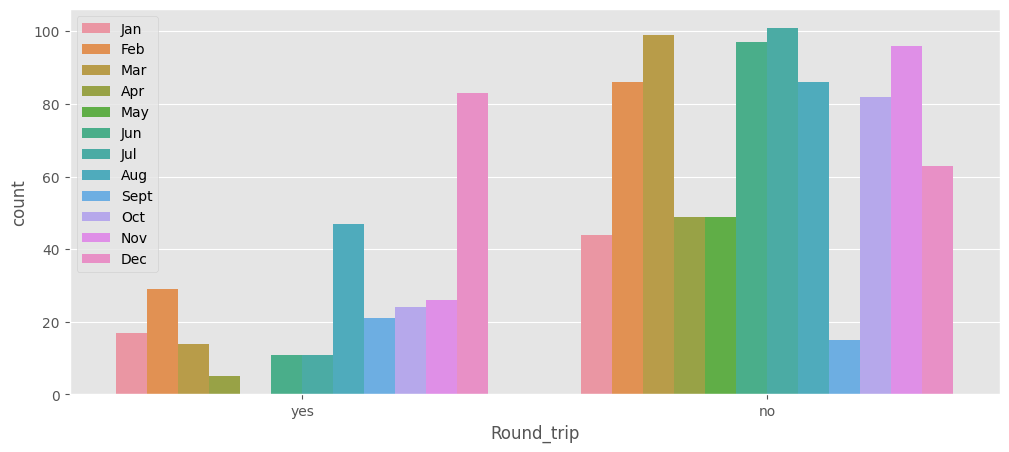

In [118]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Round_trip', hue='month', data=df)
plt.legend()
